MUIRU EUGENE GITONGA

**Context**

Thera Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

**Data Set**

*   ID: Customer ID
*   Age: Customer’s age in completed years
*   Experience: #years of professional experience
*   Income: Annual income of the customer (in thousand dollars)
*   ZIP Code: Home Address ZIP code.
*   Family: the Family size of the customer
*   CCAvg: Average spending on credit cards per month (in thousand dollars)
*   Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
*   Mortgage: Value of house mortgage if any. (in thousand dollars)
*   Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
*   Securities_Account: Does the customer have securities account with the bank?
*   CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
*   Online: Do customers use internet banking facilities?
*   CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?













**Problem**

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.
4. Does Age have any impact of customer buying loan?
5. Do people with less income borrow loans .?



**Libraries**

In [3]:
pip install zipcodes

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier#to build the model


warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

**Read and Understand data**

In [3]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df_loan=df.copy()
print(f'There are {df_loan.shape[0]} rows and {df_loan.shape[1]} columns') # fstring 

There are 5000 rows and 14 columns


In [4]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df_loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
#get the size of dataframe
print ("Rows     : " , df_loan.shape[0])  #get number of rows/observations
print ("Columns  : " , df_loan.shape[1]) #get number of columns

Rows     :  5000
Columns  :  14


In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset. All the columns are numerical here. Personal loan is target variable. Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.

In [8]:
df_loan.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2135,2136,45,15,28,95039,1,0.75,3,0,0,1,0,0,0
250,251,30,6,29,94305,3,1.00,2,117,0,0,0,0,0
4030,4031,58,32,44,92354,1,0.80,2,0,0,0,0,0,0
4406,4407,50,25,24,95133,4,0.40,2,137,0,0,0,1,0
2996,2997,42,18,103,91367,1,3.33,1,0,1,1,1,1,1
4326,4327,32,8,42,95136,1,0.20,3,102,0,0,0,1,0
4065,4066,44,19,68,94305,1,3.70,3,0,0,0,0,1,0
4039,4040,34,9,104,92152,1,4.60,1,0,0,0,0,1,1
733,734,49,24,80,92009,1,1.20,1,0,0,0,0,1,0
69,70,53,29,20,90045,4,0.20,1,0,0,0,0,1,0


***Id column is not needed and can be dropped.***

In [9]:
df_loan.drop(['ID'],axis=1,inplace=True) #droping id

# **Data Preprocessing**

**Processing Zipcode**

Zipcode is a categorical feature and can be a good predictor of target variable. We can analyse if there is any pattern on location for customers who had borrowed loaned during previous campaign. Trying to see if we can reduce the category

In [15]:
df_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [16]:
df_loan.ZIPCode.nunique()

467

In [17]:
# get unique zipcodes
list_zipcode=df_loan.ZIPCode.unique()

In [18]:
#here we are creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [21]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

We got almost all county expect for 96651,92634,93077,92717. We can fix this zip code by searching internet. Couldn't find for other zipcodes.

In [22]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [23]:
df_loan['County']=df_loan['ZIPCode'].map(dict_zip)

In [24]:
df_loan.County.nunique()

40

In [25]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
County               5000 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


**Fixing the data types**

Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard' ,Education are of int/object type, we can change them to category type to reduce the dataspace required.

In [26]:
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df_loan[category_col] = df_loan[category_col].astype('category')

In [27]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null category
Family               5000 non-null category
CCAvg                5000 non-null float64
Education            5000 non-null category
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null category
SecuritiesAccount    5000 non-null category
CDAccount            5000 non-null category
Online               5000 non-null category
CreditCard           5000 non-null category
County               5000 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 270.2 KB


***we can see that the memory usage has decreased from 547 to 270.2.***

**Processing Experience**

In [28]:
# checking negative and zero values for experience. 
df_loan[df_loan['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

52 customers from age group 23 - 30 have negative values in experience

In [29]:
df_loan[df_loan['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
4514,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0,Los Angeles County


In [30]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age              23                   24                       25             \
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Age                          26            ...         64         65  \
Education          3          1         2  ...          3          1   
count      19.000000  30.000000  24.00000  ...  30.000000  30.000000   
mean       -0.526316   1.433333   0.75000  ...  38.533333  39.866667   
std         0.696692   0.817200   0.84699  ...   1.756433   0.730297   
min        -2.000000   0.000000  -1.00000  ...  34.000000  39.000000   
25%        -1.000000   1.000000   0.00000  ...  38.000000  39.000000   
50%        -1.000000   2.000000   1.00000  ...  39.000000  40.000000   
75%         0.000000   2.000000   1.00000  ...  40.000000  40.000000   
max         1.000000   2.000000   2.00000  ...  40.000000  41.000000   

Age                                     66                               67  \
Education          2          3          1          2          3          1   
count      23.000000  27.000000   9.000000   5.000000  10.000000   5.000000   
mean       40.086957  39.518519  41.111111  41.400000  40.400000  41.600000   
std         0.733178   1.553417   0.333333   0.547723   1.646545   0.894427   
min        39.000000  35.000000  41.000000  41.000000  36.000000  41.000000   
25%        40.000000  39.000000  41.000000  41.000000  40.250000  41.000000   
50%        40.000000  40.000000  41.000000  41.000000  41.000000  41.000000   
75%        41.000000  41.000000  41.000000  42.000000  41.000000  42.000000   
max        41.000000  41.000000  42.000000  42.000000  42.000000  43.000000   

Age                             
Education          2         3  
count       3.000000   4.00000  
mean       42.666667  41.50000  
std         0.577350   0.57735  
min        42.000000  41.00000  
25%        42.500000  41.00000  
50%        43.000000  41.50000  
75%        43.000000  42.00000  
max        43.000000  42.00000  

[8 rows x 134 columns]

Its seems experience is negative for all observation with for age 23,24, and few others . Based on there age and education it seems values were negative by mistake. so changing it to absoulte values of experience.

In [31]:
df_loan.loc[df_loan['Experience']<0,'Experience']=np.abs(df_loan['Experience'])

In [32]:
df_loan[df_loan['Experience']==0]['Age'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

Checking age and income for customers with 0 experience. We will see how to impute this columns more after EDA.

# **Exploratory Data Analysis**

In [33]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


In [34]:
for column in category_col:
    print(df_loan[column].value_counts())
    print("#" * 40)

0    4520
1     480
Name: PersonalLoan, dtype: int64
########################################
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
########################################
0    4698
1     302
Name: CDAccount, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: CreditCard, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
92093     51
90024     50
90245     50
91330     46
90089     46
94304     45
92121     45
94143     37
94608     34
95051     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94301     27
94550     27
94542     27
95819     26
        ... 
96094      2
91129      2

**Observations**

1. Customers age is in range of 23 - 67, with mean and median of ~45.
2. Maximum experience is 43 years. where as mean and median are ~20.
3. Income are in range 8k to 224k USD. Mean is 73k USD and median is 64k USD.224 Max salary need to be verified
4. Maximum mortgage taken is 635k USD.Need to verify this
5. Average spending on credit card per month ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD
6. 1095 customers are from Los Angeles County.
7. 480 customers had borrowed loan before.

**Univariate Analysis**

 *It's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.*

In [61]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)

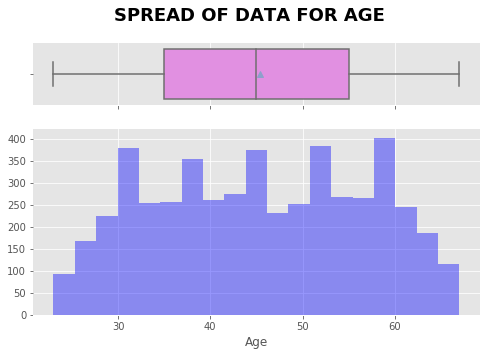

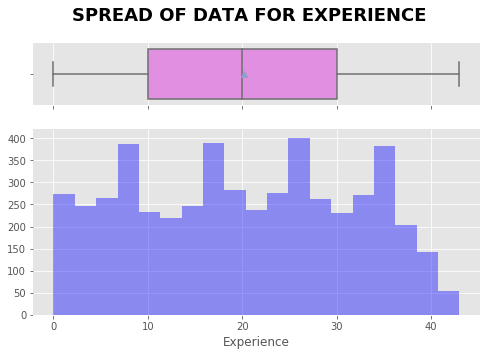

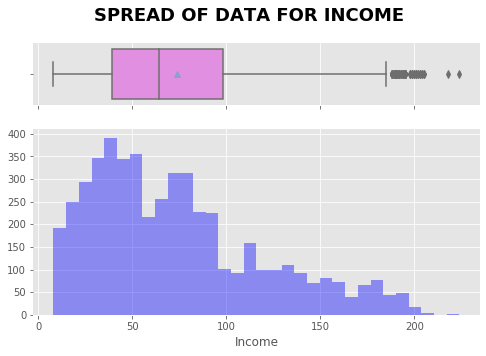

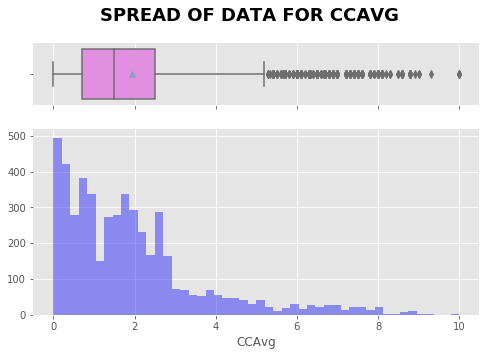

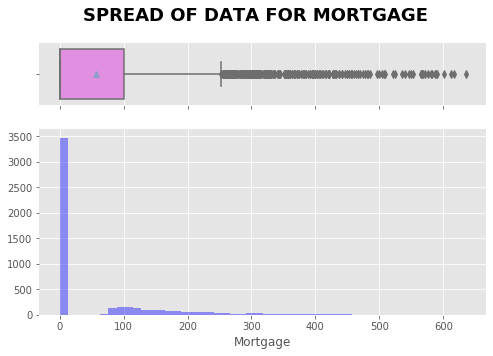

In [62]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

**Observations**

1. Age and experience both has same distrubtion with spike at 5 points.
2. Income is right skewed and has some outlier on higher side which can be clipped.
3. Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
4. Mortgage is mostly 0 . but is right skewed and has lot of outlier on higher side which can be clipped.

**Age**

Age can be a vital factor in borrowinng loan, converting ages to bin to explore if there is any pattern

In [38]:
df_loan['Agebin'] = pd.cut(df_loan['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

**Income**

To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group

In [39]:
# Create a new variable - Income group

df_loan["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

**Spending**

To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [40]:
df_loan.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [41]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

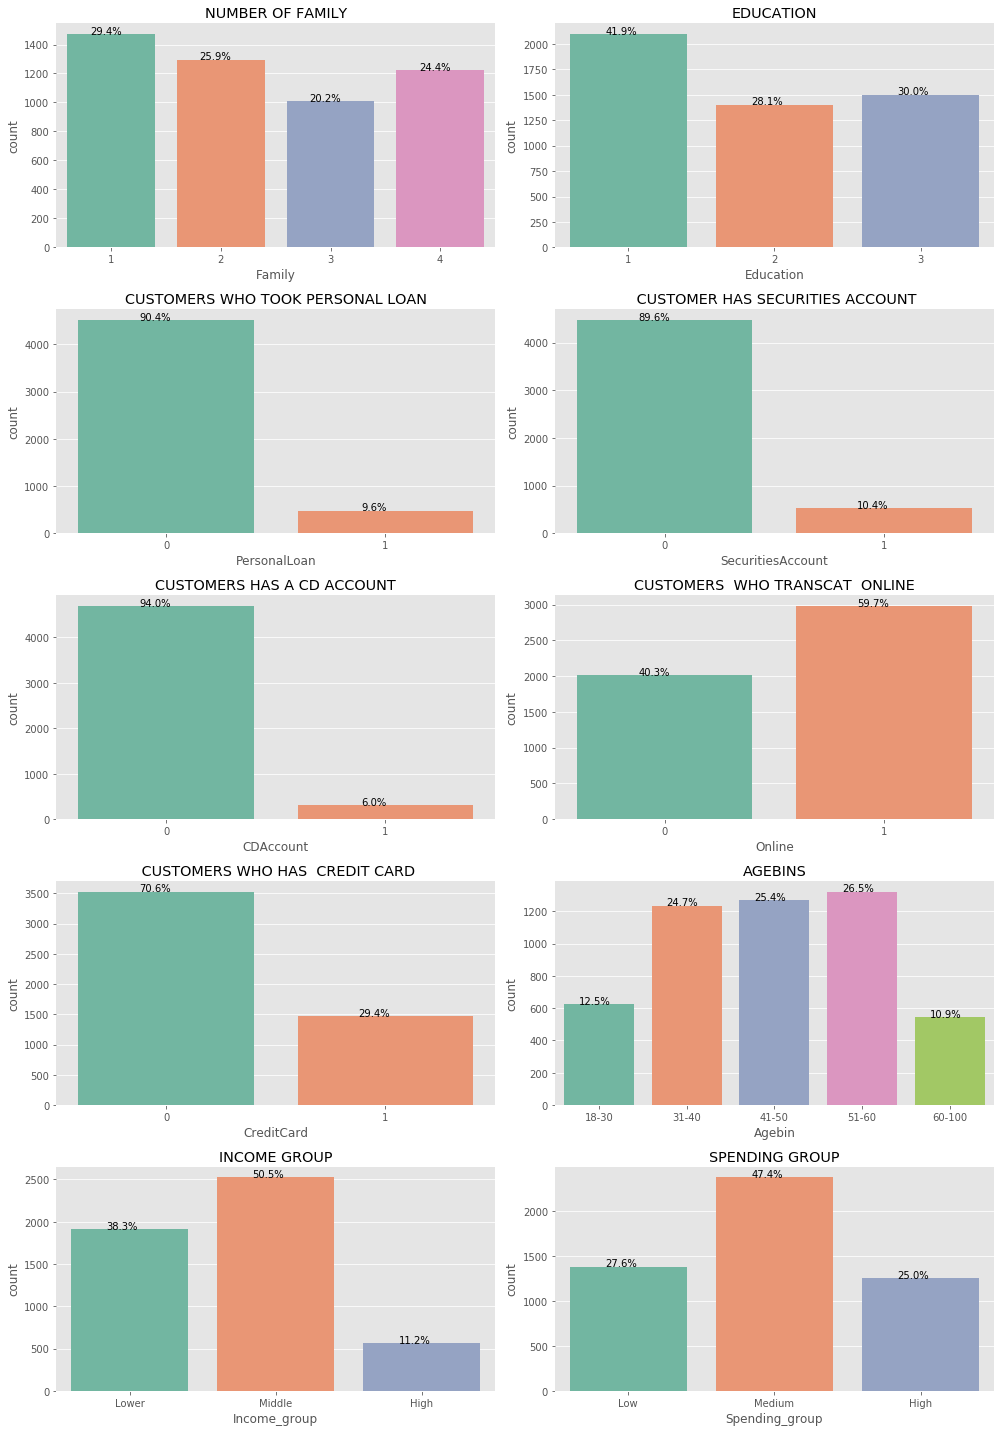

In [43]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_loan[variable], data=df_loan )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

**Observations**

~29.4 % customers are single.

~41.9% customers are undergrad.

~9.6% bought a personal loan from the bank.

10.4 % customers have a securities account with the bank

6 % customer have a CD account.

60% customers transact online.

29.4% customers have credit cards.

~ 75 % of customers are in range of 31- 60.

~ 50 % Most of bank customers belong to middle income group.

~48 % of customers has medium Average spending

In [44]:
df_loan.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size       
PersonalLoan                0      1
County                              
9307                      1.0    NaN
96651                     6.0    NaN
Alameda County          456.0   44.0
Butte County             17.0    2.0
Contra Costa County      73.0   12.0
El Dorado County         16.0    1.0
Fresno County            24.0    2.0
Humboldt County          30.0    2.0
Imperial County           3.0    NaN
Kern County              47.0    7.0
Lake County               4.0    NaN
Los Angeles County      984.0  111.0
Marin County             48.0    6.0
Mendocino County          7.0    1.0
Merced County             4.0    NaN
Monterey County         113.0   15.0
Napa County               3.0    NaN
Orange County           333.0   33.0
Placer County            22.0    2.0
Riverside County         50.0    6.0
Sacramento County       169.0   15.0
San Benito County        14.0    NaN
San Bernardino County    98.0    3.0
San Diego County        509.0   59.0
San Francisco County    238.0   19.0
San Joaquin County       12.0    1.0
San Luis Obispo County   28.0    5.0
San Mateo County        192.0   12.0
Santa Barbara County    143.0   11.0
Santa Clara County      492.0   71.0
Santa Cruz County        60.0    8.0
Shasta County            15.0    3.0
Siskiyou County           7.0    NaN
Solano County            30.0    3.0
Sonoma County            22.0    6.0
Stanislaus County        14.0    1.0
Trinity County            4.0    NaN
Tuolumne County           7.0    NaN
Ventura County          103.0   11.0
Yolo County             122.0    8.0

<Figure size 1080x1728 with 0 Axes>

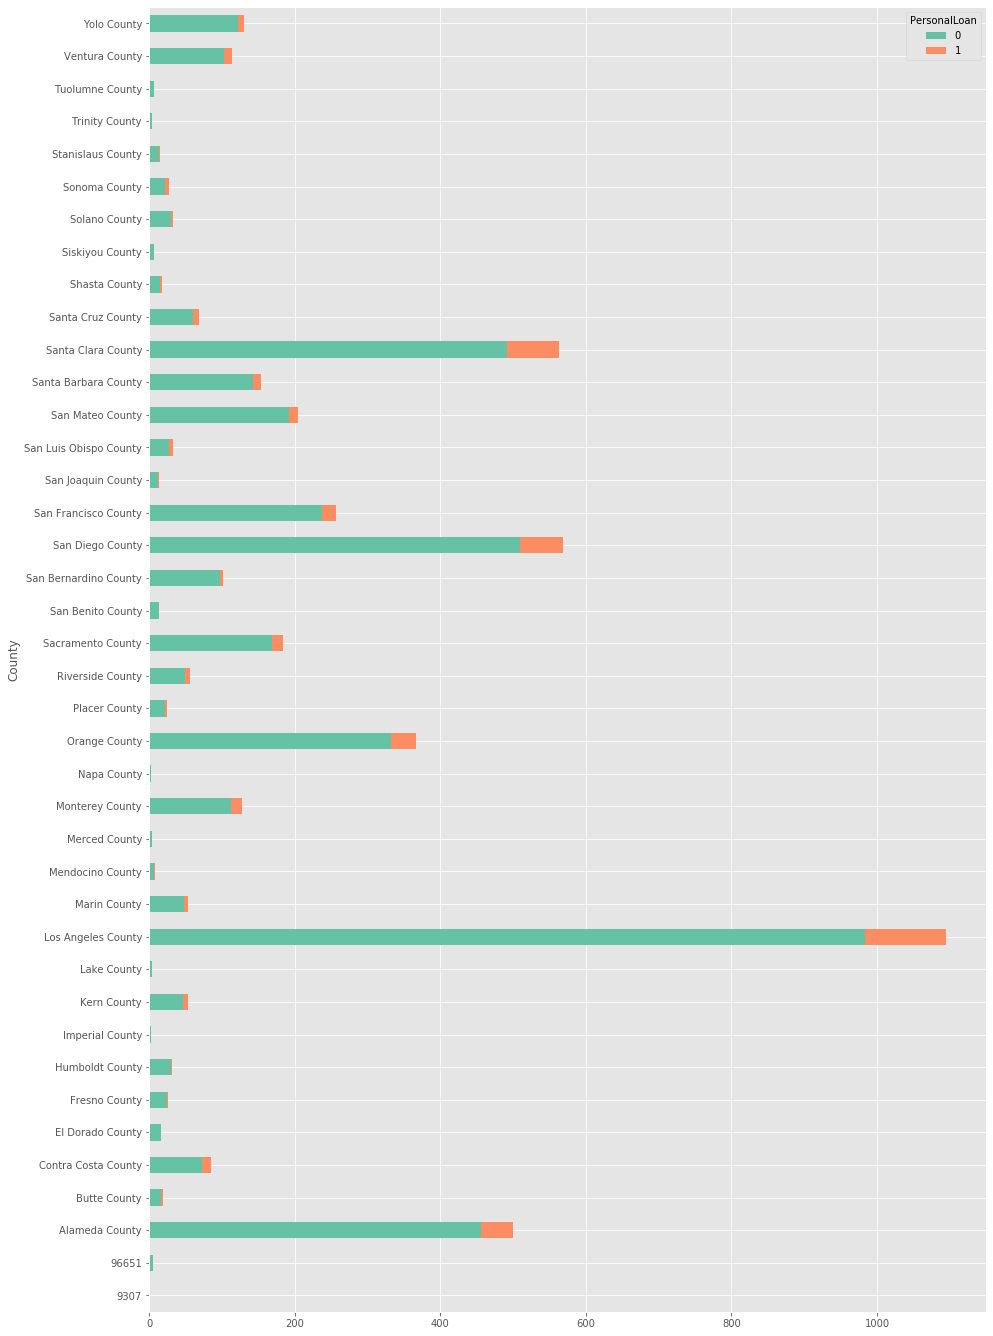

In [45]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df_loan['County'],columns=df_loan['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

It can be seen the percentage of loan taken from various country differ.There are so many county converting them to regions will help in our model

In [46]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

Converting the county to regions based on https://www.calbhbc.org/region-map-and-listing.html

In [47]:
df_loan['Regions'] = df_loan['County'].map(counties)

In [48]:
df_loan['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [49]:
df_loan.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Agebin               0
Income_group         0
Spending_group       0
Regions              1
dtype: int64

In [50]:
df_loan.dropna(inplace=True)

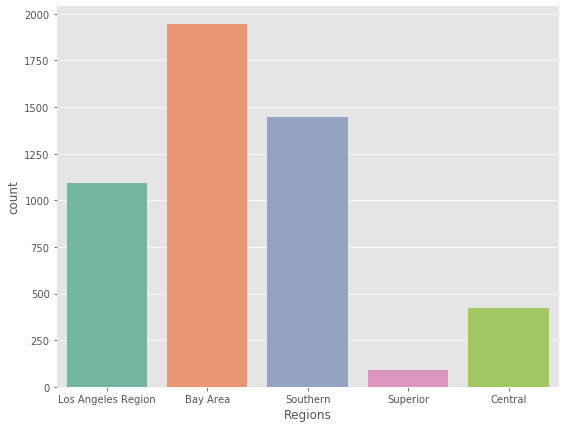

In [51]:
plt.figure(figsize=(9,7))
sns.countplot(data=df_loan,x=df_loan['Regions'])
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [52]:
X = df_loan.drop(['PersonalLoan'], axis=1)
Y = df_loan['PersonalLoan']

oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [53]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

# **Model building Decision Tree**

Data preparation

Partition the data into train and test set.

Built a CART model on the train data.

Tune the model and prune the tree, if required.

Test the data on test set.

In [54]:
#drop column which we don't need for modelling
df_Decision = df_loan.copy()
df_Decision.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [55]:
X_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

In [56]:
#oneHotCols=['Regions']
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)
# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

**Build Model**


*   I'm using 'gini' criteria to split.
*   If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.
*   To handle this imbalanced data set,we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
*   class_weight is a hyperparameter for the decision tree classifier.
*  Since not being able to identify a potential customer is the biggest loss. 
* Hence, recall is the right metric to check the performance of the model.







**How to reduce losses?i.e need to reduce False Negatives ?**

In this case, not being able to identify a potential customer is the biggest loss we can face. 

Hence, recall is the right metric to check the performance of the model.Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.
We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

In [74]:
def make_confusion_matrix(y_actual,y_predict,title):
   
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])

In [81]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))

In [82]:
#since data is imbalanced adding weights
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)

 Accuracy : Train : 1.0  Test: 0.9826666666666667
 Recall   : Train : 1.0  Test: 0.8888888888888888


Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is overfitted

In [83]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']


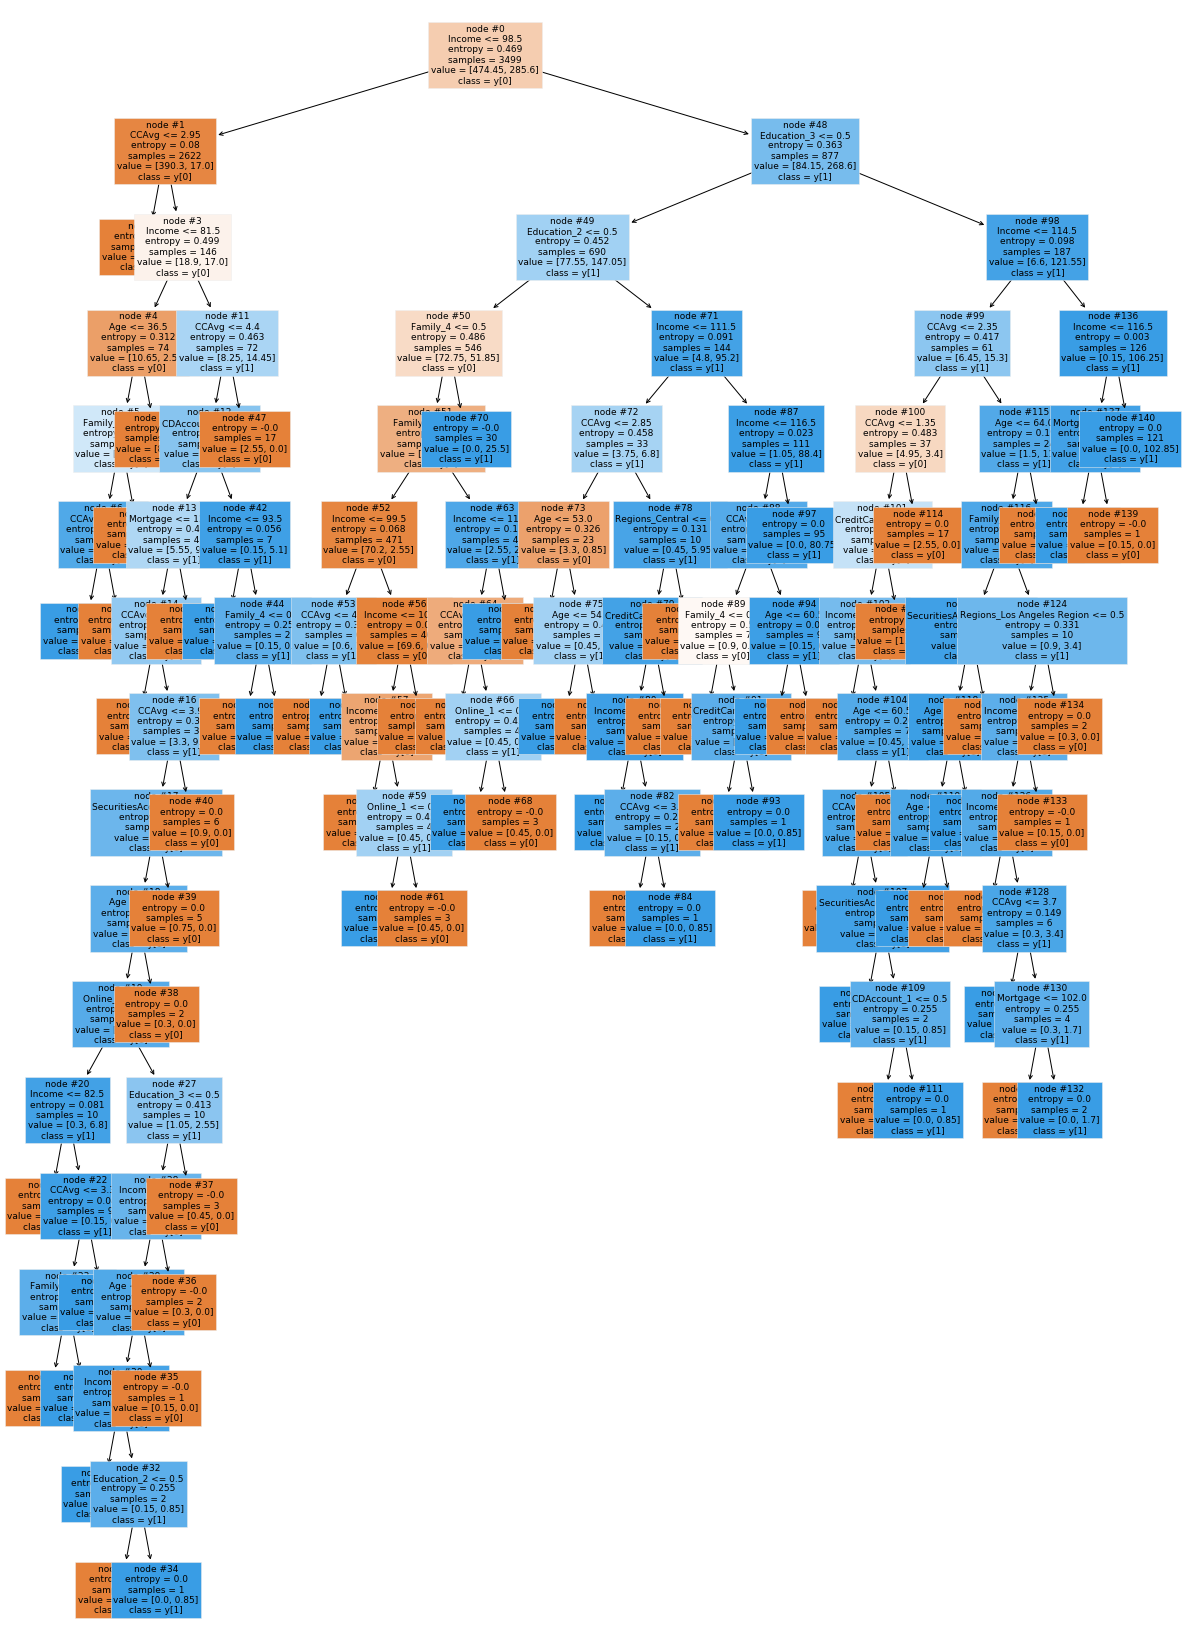

In [84]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [87]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CDAccount_1 <= 0.50
|   |   |   |   |   |--- Mortgage <= 127.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |   |   |   |--- SecuritiesAccount_1 <= 0.50
|   |   |

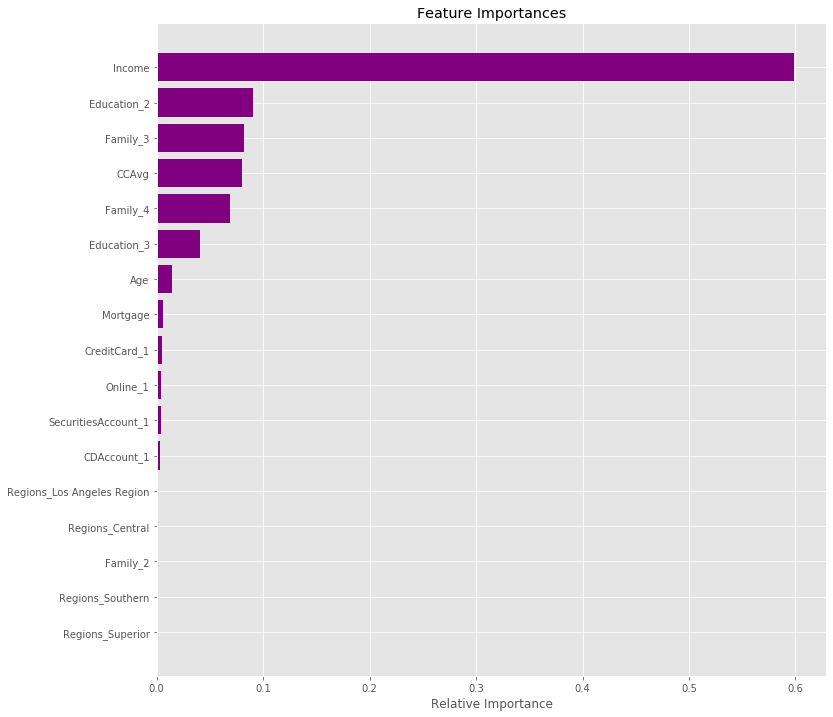

In [88]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Using GridSearch for Hyperparameter tuning of our tree model

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

It is an exhaustive search that is performed on a the specific parameter values of a model.

The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Let's see if we can improve our model performance even more.

**Here I will prune our Decision tree**

In [90]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [91]:
# Fit the best algorithm to the data. 
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)

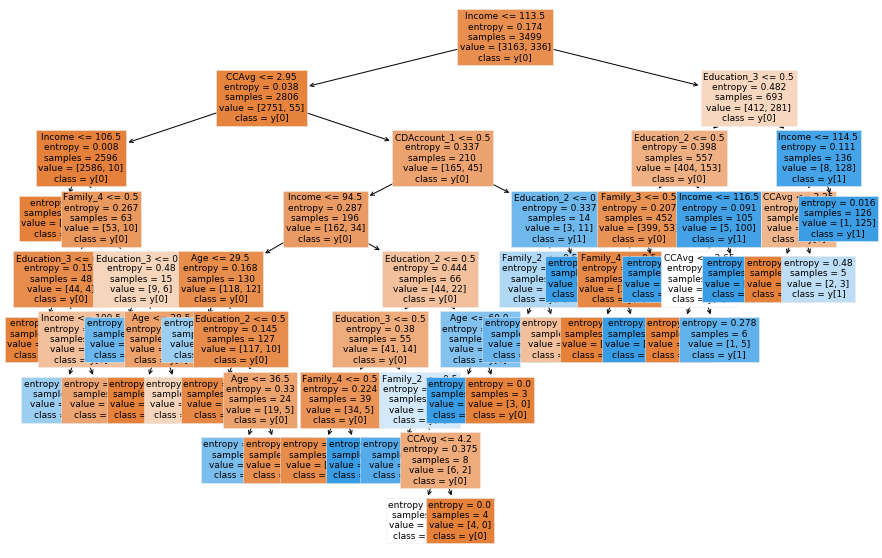

In [92]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

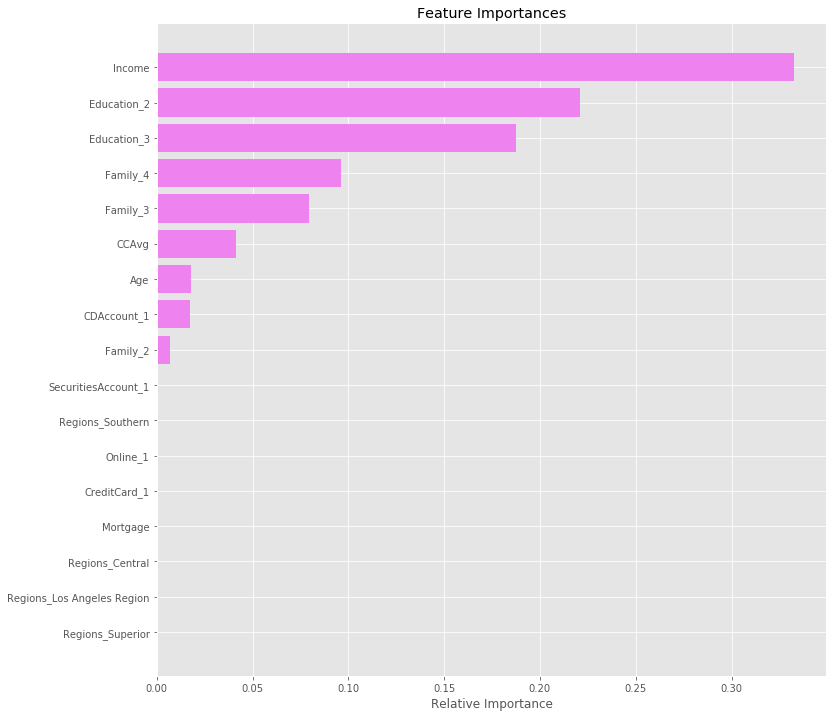

In [93]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [94]:
get_recall_score(estimator)

 Accuracy : Train : 0.992283509574164  Test: 0.984
 Recall   : Train : 0.9494047619047619  Test: 0.9166666666666666




*   With HyperParameter max_depth=6, max_leaf_nodes=20, min_samples_leaf=7 the overfitting on train has reduced, but the recall for test has not improved.
*   Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.

*   But the recall metric is still 91 and false negatives are 12.We don't want to loose opportunity in predicting this customers. so Let see if instead of pre pruning , post pruning helps in reducing false negative.





**The Recall on train and test indicate I have created a generalized model. with 94 % accuracy and reduced False negatives.**

**Observation**

After Post Pruning ,the false negative has reduced to 6.The accuracy on test data is 98% & Recall is 91%.

**Conclusion**


*   I analyzed the Personal Loan campaign data using EDA and by using  Decision Tree Classifier to build a likelihood of Customer buying Loan.
*   Decision tree can easily overfit. They require less datapreprocessing compared to logistic Regression and are easy to understand.
*   I used decision trees with prepruning and post pruning. The Post pruning model gave 94 % recall with 99% accuracy.
*   Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.



